# Question 3 (60 marks)
<div class="alert alert-block alert-warning">
_Place all your coding work for this question in the lab notebook template and your project report in the TMA word processing template. ._

In [1]:
#importing main libraries
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option('display.max_rows', 2000)
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

# Importing datasets

In [2]:
# we are skipping first 14 rows because we dont need the data file properties , we want actually data to see and manipulate.
al_staf_equality=pd.read_csv(r'All staff (excluding atypical) by equality characteristics 2018_2019 .csv',skiprows=14)

al_staf_equality.head(10)

,Category Marker,Category,Country of HE Provider,Academic contract marker,Activity standard occupational classification,Number
0,Age Group,25 and under,England,Academic contract,"Managers, directors and senior officials",5
1,Age Group,25 and under,England,Academic contract,Professional occupations,4900
2,Age Group,25 and under,England,Academic contract,Associate professional and technical occupations,85
3,Age Group,25 and under,England,Academic contract,Clerical and manual occupations,0
4,Age Group,25 and under,England,Academic contract,Total academic staff,4990
5,Age Group,25 and under,England,Non-academic contract,"Managers, directors and senior officials",45
6,Age Group,25 and under,England,Non-academic contract,Professional occupations,1615
7,Age Group,25 and under,England,Non-academic contract,Associate professional and technical occupations,3865
8,Age Group,25 and under,England,Non-academic contract,Administrative and secretarial occupations,6250
9,Age Group,25 and under,England,Non-academic contract,Skilled trades occupations,395


In [3]:
al_staf_equality.rename(columns={'Category Marker': 'Category_Marker',
                                   'Country of HE Provider':'Country_of_HE_Provider',
                                  'Academic contract marker':'Academic_contract_marker',
                                  'Activity standard occupational classification':'Activity_standard_occupational_classification',
                                  }, inplace=True)
al_staf_equality.head(10)

,Category_Marker,Category,Country_of_HE_Provider,Academic_contract_marker,Activity_standard_occupational_classification,Number
0,Age Group,25 and under,England,Academic contract,"Managers, directors and senior officials",5
1,Age Group,25 and under,England,Academic contract,Professional occupations,4900
2,Age Group,25 and under,England,Academic contract,Associate professional and technical occupations,85
3,Age Group,25 and under,England,Academic contract,Clerical and manual occupations,0
4,Age Group,25 and under,England,Academic contract,Total academic staff,4990
5,Age Group,25 and under,England,Non-academic contract,"Managers, directors and senior officials",45
6,Age Group,25 and under,England,Non-academic contract,Professional occupations,1615
7,Age Group,25 and under,England,Non-academic contract,Associate professional and technical occupations,3865
8,Age Group,25 and under,England,Non-academic contract,Administrative and secretarial occupations,6250
9,Age Group,25 and under,England,Non-academic contract,Skilled trades occupations,395


In [4]:
al_staf_equality.describe()

,Number
count,1635.000000
mean,6458.000000
std,24109.732529
min,0.000000
25%,10.000000
50%,155.000000
75%,1675.000000
max,222885.000000


In [5]:
al_staf_equality.shape

(1635, 6)

In [6]:
al_staf_equality.count()

Category_Marker                                  1635
Category                                         1635
Country_of_HE_Provider                           1635
Academic_contract_marker                         1635
Activity_standard_occupational_classification    1635
Number                                           1635
dtype: int64

In [9]:
#staf_mode second data set fig 5
#same as above here we skip first 12 rows which only contains information regarding title etc
staf_mode=pd.read_csv(r'Staff by mode of employment, academic contract marker and sex 2018_19.csv', skiprows=12)
staf_mode.head(10)

,Category Marker,Category,Sex,Number,Percentage
0,Mode of employment,Full-time,Female,143665,49%
1,Mode of employment,Full-time,Male,152395,51%
2,Mode of employment,Full-time,Other,125,0%
3,Mode of employment,Part-time,Female,96550,67%
4,Mode of employment,Part-time,Male,47185,33%
5,Mode of employment,Part-time,Other,35,0%
6,Academic contract marker,Academic,Female,100365,46%
7,Academic contract marker,Academic,Male,116640,54%
8,Academic contract marker,Academic,Other,65,0%
9,Academic contract marker,Non-academic,Female,139850,63%


In [18]:
#rename column header having space
staf_mode.rename(columns={'Category Marker': 'Category_Marker'}, inplace=True)
staf_mode.head(10)

,Category_Marker,Category,Sex,Number,Percentage
0,Mode of employment,Full-time,Female,143665,49%
1,Mode of employment,Full-time,Male,152395,51%
2,Mode of employment,Full-time,Other,125,0%
3,Mode of employment,Part-time,Female,96550,67%
4,Mode of employment,Part-time,Male,47185,33%
5,Mode of employment,Part-time,Other,35,0%
6,Academic contract marker,Academic,Female,100365,46%
7,Academic contract marker,Academic,Male,116640,54%
8,Academic contract marker,Academic,Other,65,0%
9,Academic contract marker,Non-academic,Female,139850,63%


In [7]:
#al_staf_acdemic Third data set
# fig 4
#skip first 13 rows
al_staf_academic=pd.read_csv(r'All staff (excluding atypical) by academic contract marker, mode of employment and hourly paid marker 2018_19.csv',
                               skiprows=13)
al_staf_academic.head(10)


,Academic contract marker,Mode of employment,Terms of employment,Zero hours contract,Sex,Hourly paid marker,Number
0,Academic contract,Full-time,Fixed-term contract,Not on a zero hours contract,Female,Salaried,15505
1,Academic contract,Full-time,Fixed-term contract,Not on a zero hours contract,Female,Hourly paid,385
2,Academic contract,Full-time,Fixed-term contract,Not on a zero hours contract,Female,Other,5
3,Academic contract,Full-time,Fixed-term contract,Not on a zero hours contract,Female,Total,15895
4,Academic contract,Part-time,Fixed-term contract,Not on a zero hours contract,Female,Salaried,10665
5,Academic contract,Part-time,Fixed-term contract,Not on a zero hours contract,Female,Hourly paid,7995
6,Academic contract,Part-time,Fixed-term contract,Not on a zero hours contract,Female,Other,85
7,Academic contract,Part-time,Fixed-term contract,Not on a zero hours contract,Female,Total,18745
8,Academic contract,All,Fixed-term contract,Not on a zero hours contract,Female,Salaried,26170
9,Academic contract,All,Fixed-term contract,Not on a zero hours contract,Female,Hourly paid,8380


In [8]:
#to define 
al_staf_academic.describe()

,Number
count,948.000000
mean,22276.091772
std,53628.431603
min,0.000000
25%,10.000000
50%,190.000000
75%,13361.250000
max,439955.000000


In [9]:
#To rename Column header having space
al_staf_academic.rename(columns={'Academic contract marker': 'Academic_contract_marker',
                                   'Mode of employment':'Mode_of_employment',
                                  'Terms of employment':'Terms_of_employment',
                                  'Zero hours contract':'Zero_hours_contract',
                                  'Hourly paid marker':'Hourly_paid_marker'}, inplace=True)
print(al_staf_academic.shape)
al_staf_academic

(948, 7)


,Academic_contract_marker,Mode_of_employment,Terms_of_employment,Zero_hours_contract,Sex,Hourly_paid_marker,Number
0,Academic contract,Full-time,Fixed-term contract,Not on a zero hours contract,Female,Salaried,15505
1,Academic contract,Full-time,Fixed-term contract,Not on a zero hours contract,Female,Hourly paid,385
2,Academic contract,Full-time,Fixed-term contract,Not on a zero hours contract,Female,Other,5
3,Academic contract,Full-time,Fixed-term contract,Not on a zero hours contract,Female,Total,15895
4,Academic contract,Part-time,Fixed-term contract,Not on a zero hours contract,Female,Salaried,10665
5,Academic contract,Part-time,Fixed-term contract,Not on a zero hours contract,Female,Hourly paid,7995
6,Academic contract,Part-time,Fixed-term contract,Not on a zero hours contract,Female,Other,85
7,Academic contract,Part-time,Fixed-term contract,Not on a zero hours contract,Female,Total,18745
8,Academic contract,All,Fixed-term contract,Not on a zero hours contract,Female,Salaried,26170
9,Academic contract,All,Fixed-term contract,Not on a zero hours contract,Female,Hourly paid,8380


In [10]:
al_staf_academic.shape

(948, 7)

In [11]:
# We are removing some dirty data which are not useful or uniform 
al_staf_academic = al_staf_academic[al_staf_academic.Sex != 'All' ] #Sex can't be All in sense
al_staf_academic = al_staf_academic[al_staf_academic.Mode_of_employment != 'All' ]  # here 'All' cant be atrribute 
all_staff_academic = al_staf_academic[al_staf_academic.Zero_hours_contract != 'All' ] # here 'All' cant be atrribute

al_staf_academic = al_staf_academic[al_staf_academic.Terms_of_employment != 'All' ] # here 'All' cant be atrribute
al_staf_academic = al_staf_academic[al_staf_academic.Academic_contract_marker != 'Total' ]# here 'Total' cant be atrribute



al_staf_academic

,Academic_contract_marker,Mode_of_employment,Terms_of_employment,Zero_hours_contract,Sex,Hourly_paid_marker,Number
0,Academic contract,Full-time,Fixed-term contract,Not on a zero hours contract,Female,Salaried,15505
1,Academic contract,Full-time,Fixed-term contract,Not on a zero hours contract,Female,Hourly paid,385
2,Academic contract,Full-time,Fixed-term contract,Not on a zero hours contract,Female,Other,5
3,Academic contract,Full-time,Fixed-term contract,Not on a zero hours contract,Female,Total,15895
4,Academic contract,Part-time,Fixed-term contract,Not on a zero hours contract,Female,Salaried,10665
5,Academic contract,Part-time,Fixed-term contract,Not on a zero hours contract,Female,Hourly paid,7995
6,Academic contract,Part-time,Fixed-term contract,Not on a zero hours contract,Female,Other,85
7,Academic contract,Part-time,Fixed-term contract,Not on a zero hours contract,Female,Total,18745
12,Academic contract,Full-time,Open-ended/permanent,Not on a zero hours contract,Female,Salaried,43500
13,Academic contract,Full-time,Open-ended/permanent,Not on a zero hours contract,Female,Hourly paid,165


In [12]:
al_staf_academic.shape

(260, 7)

# Research Questions

# Q1.	How many Males has Open-ended/permanent contract?

In [14]:
query_1 = '''SELECT Sum("Number") as total_male , "Sex" FROM al_staf_academic  where "Sex" = "Male" and "Terms_of_employment" = "Open-ended/permanent" group by "Sex";'''
res_1 = pysqldf(query_1)
res_1

,total_male,Sex
0,601195,Male


# Q2.	Find and Visualize the Total number of staff persons in each Mode of employment.

In [15]:
query_2 = '''SELECT sum("Number") as total_staff , "Mode_of_employment" FROM all_staff_academic  group by "Mode_of_employment";'''
res_2 = pysqldf(query_2)
res_2

,total_staff,Mode_of_employment
0,1184735,Full-time
1,575055,Part-time


# Visualization 

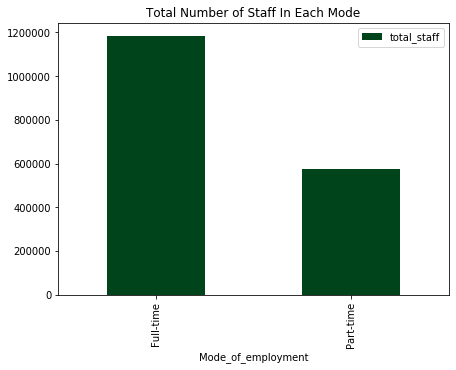

In [16]:
#using bar graph for visualize and analysis
res_2.plot.bar(x='Mode_of_employment', y='total_staff' , colormap='BuGn_r', title='Total Number of Staff In Each Mode')
plt.gcf().set_size_inches(7, 5)

plt.show()

# Q3.	 Count the Total number of staff persons in each Hourly_paid_marker

In [17]:
query_3 = '''SELECT sum("Number") as total_staff , "Hourly_paid_marker" FROM al_staf_academic  group by "Hourly_paid_marker";'''
res_3 = pysqldf(query_3)
res_3

,total_staff,Hourly_paid_marker
0,73190,Hourly paid
1,465,Other
2,806215,Salaried
3,879900,Total


# Visualization 

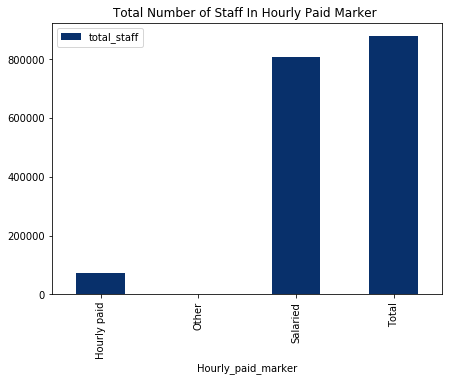

In [18]:
res_3.plot.bar(x='Hourly_paid_marker', y='total_staff' , colormap='Blues_r', title='Total Number of Staff In Hourly Paid Marker ')
plt.gcf().set_size_inches(7, 5)
plt.show()

# Q4.	Show the hourly paid salary for Females in Part-time contract?

In [20]:
query_4 = '''SELECT "Hourly_paid_marker" , sum("Number") as total_count_female ,"Mode_of_employment" FROM al_staf_academic where "Hourly_paid_marker"="Hourly paid" and "Sex"= "Female" and "Mode_of_employment" = "Part-time" 
Group by "Hourly_paid_marker" ,"Mode_of_employment";'''
res_4 = pysqldf(query_4)
res_4

,Hourly_paid_marker,total_count_female,Mode_of_employment
0,Hourly paid,36655,Part-time


# Q5.	How many staff in each country with age category Asian And 26-35? 

In [22]:
query_5 = '''SELECT sum("Number") as count , "Country_of_HE_Provider" FROM al_staf_equality 
Where "Category"="26-35" OR "Category"="Asian" 
Group by "Country_of_HE_Provider";'''
#OR "Category"="UK" OR "Category"="White" OR "Category"="Black"
res_5 = pysqldf(query_5)
res_5

,count,Country_of_HE_Provider
0,285815,All
1,242015,England
2,3545,Northern Ireland
3,28790,Scotland
4,11470,Wales


# Visualization

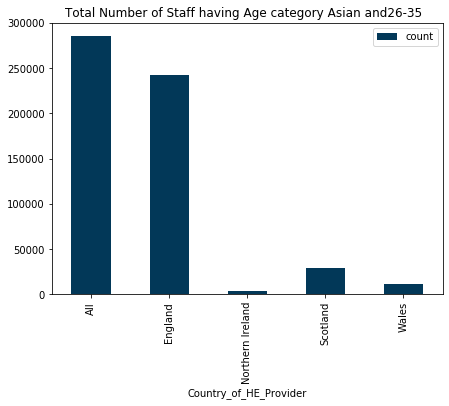

In [23]:
res_5.plot.bar(x='Country_of_HE_Provider', y='count' , colormap='PuBu_r', title='Total Number of Staff having Age category Asian and26-35  ')
plt.gcf().set_size_inches(7, 5)
plt.show()

# Q6.	Find and visualize the total count of staff in each category when country is England and Scotland

In [24]:
query_6 = '''SELECT sum("Number") as count , "Category" FROM al_staf_equality
Where "Country_of_HE_Provider"="Scotland" OR "Country_of_HE_Provider"="England"
Group by "Category";'''

res_6 = pysqldf(query_6)
res_6

,count,Category
0,50715,25 and under
1,206505,26-35
2,219130,36-45
3,202525,46-55
4,124385,56-65
5,20730,66 and over
6,64300,Asian
7,21565,Black
8,449645,Female
9,42710,Known to have a disability


# Visualization

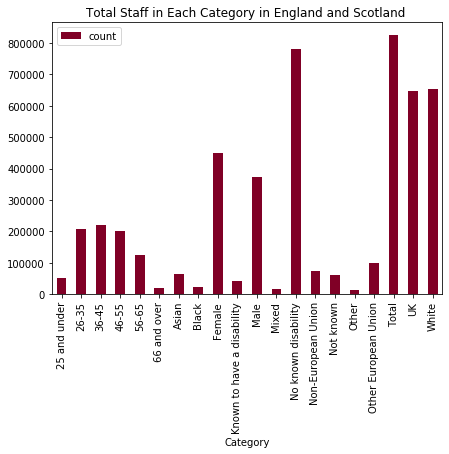

In [25]:
res_6.plot.bar(x='Category', y='count' , colormap='YlOrRd_r', title='Total Staff in Each Category in England and Scotland ')
plt.gcf().set_size_inches(7, 5)
plt.show()

# Q.7  Show the combine list of Total academic staff from Activity_standard_occupational_classification And England from Country_of_HE_Provider.Also find total rows when they both comes together

In [29]:
query_7 = '''SELECT "Activity_standard_occupational_classification" , "Country_of_HE_Provider" FROM al_staf_equality 
Where "Country_of_HE_Provider"="England" And "Activity_standard_occupational_classification"="Total academic staff"

;'''

res_7 = pysqldf(query_7)
print(res_7)
res_7.count()

   Activity_standard_occupational_classification Country_of_HE_Provider
0                           Total academic staff                England
1                           Total academic staff                England
2                           Total academic staff                England
3                           Total academic staff                England
4                           Total academic staff                England
5                           Total academic staff                England
6                           Total academic staff                England
7                           Total academic staff                England
8                           Total academic staff                England
9                           Total academic staff                England
10                          Total academic staff                England
11                          Total academic staff                England
12                          Total academic staff                

Activity_standard_occupational_classification    22
Country_of_HE_Provider                           22
dtype: int64

# Q8. Find and visualize total count of Activity_standard_occupational_classification Staff.

In [30]:
query_8 = '''SELECT sum("Number") as count , "Activity_standard_occupational_classification" FROM al_staf_equality  group by "Activity_standard_occupational_classification";'''
res_8 = pysqldf(query_8)
res_8

,count,Activity_standard_occupational_classification
0,856710,Administrative and secretarial occupations
1,17515,Associate professional and technical occupations
2,603720,Associate professional and technical occupations
3,86220,"Caring, leisure and other service occupations"
4,35,Clerical and manual occupations
5,292265,Elementary occupations
6,6465,"Managers, directors and senior officials"
7,142330,"Managers, directors and senior officials"
8,17305,"Process, plant and machine operatives"
9,2580765,Professional occupations


# Visualization

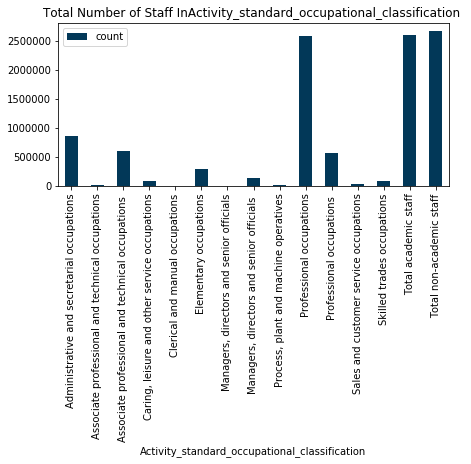

In [31]:
res_8.plot.bar(x='Activity_standard_occupational_classification', y='count' , colormap='PuBu_r', title='Total Number of Staff InActivity_standard_occupational_classification ')
plt.gcf().set_size_inches(7, 3)
plt.show()

# Q9. Find the list of Staff of Non-academic contract when category is White.

In [34]:
query_9 = '''SELECT "Academic_contract_marker" , "Category" FROM al_staf_equality
Where "Academic_contract_marker"="Non-academic contract" And "Category"="White"

;'''

res_9 = pysqldf(query_9)
res_9


,Academic_contract_marker,Category
0,Non-academic contract,White
1,Non-academic contract,White
2,Non-academic contract,White
3,Non-academic contract,White
4,Non-academic contract,White
5,Non-academic contract,White
6,Non-academic contract,White
7,Non-academic contract,White
8,Non-academic contract,White
9,Non-academic contract,White


In [36]:
res_9.count()


Academic_contract_marker    50
Category                    50
dtype: int64

#  Q10. Find and visualize total number of Male, Other and Females On a zero hour contract

In [53]:
query_10 = '''SELECT sum("Number") as count , "Sex" FROM al_staf_academic
Where "Zero_hours_contract"="On a zero hours contract"
Group by "Sex";'''

res_10 = pysqldf(query_10)
res_10

,count,Sex
0,7740,Female
1,6155,Male
2,0,Other


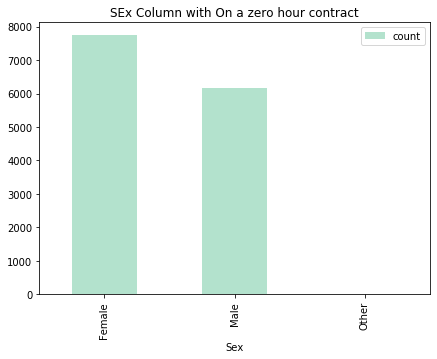

In [51]:
res_10.plot.bar(x='Sex', y='count' , colormap='Pastel2', title='SEx Column with On a zero hour contract')
plt.gcf().set_size_inches(7, 5)
plt.show()

TypeError: Could not convert FemaleMaleOther to numeric

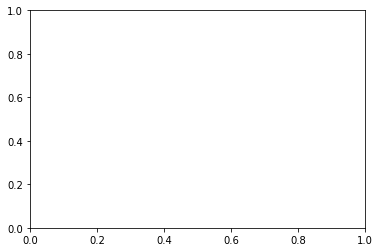

In [52]:
sns.regplot(x='Sex', y='count', data= res_10)
plt.ylim(0,)


In [65]:
query_11 = '''SELECT sum("Number") as count1 , "Sex" FROM al_staf_academic
Where "Zero_hours_contract"="Not on a zero hours contract"
Group by "Sex";'''

res_11 = pysqldf(query_11)
res_11

,count1,Sex
0,472695,Female
1,392975,Male
2,315,Other


In [68]:
res_11.rename(columns={'Sex': 'Sex11',
                                   }, inplace=True)
res_11

,count1,Sex11
0,472695,Female
1,392975,Male
2,315,Other


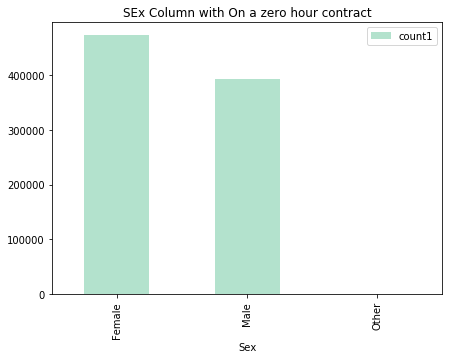

In [66]:
res_11.plot.bar(x='Sex', y='count1' , colormap='Pastel2', title='SEx Column with On a zero hour contract')
plt.gcf().set_size_inches(7, 5)
plt.show()

In [42]:
res_11.corr()

,count
count,1.0


In [44]:
res_11['Sex']=res_11['Sex'].astype('category').cat.codes
#res_11['Zero_hours_contract']=res_11['Zero_hours_contract'].astype('category').cat.codes

res_11.corr()

,count,Sex
count,1.000000,-0.934012
Sex,-0.934012,1.000000


(0, 868561.9068637994)

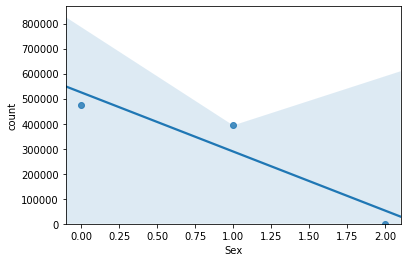

In [46]:
sns.regplot(x='Sex', y='count', data= res_11)
plt.ylim(0,)


In [60]:
p=res_11.append(res_10)
p

C:\Users\Hamxa\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Sex,count,count1
0,Female,NaN,472695.0
1,Male,NaN,392975.0
2,Other,NaN,315.0
0,Female,7740.0,NaN
1,Male,6155.0,NaN
2,Other,0.0,NaN


In [69]:
q=res_11.append(res_10)
q

C:\Users\Hamxa\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Sex,Sex11,count,count1
0,NaN,Female,NaN,472695.0
1,NaN,Male,NaN,392975.0
2,NaN,Other,NaN,315.0
0,Female,NaN,7740.0,NaN
1,Male,NaN,6155.0,NaN
2,Other,NaN,0.0,NaN
